### Define a custom function

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.modeling.models
from astropy.modeling.models import custom_model
from astropy.modeling.fitting import LevMarLSQFitter
from scipy import special

# Define model
@custom_model
def H_plus_G(x, alpha=1.1133, beta= -2.609*1e-4,  delta=0.1, mu=-1.931*1e-2, meanG=-3.531*1e-2, sigmaG=0.4092, A0=0.6174, A1=0.3826):
    """
    Create a weighted superposition of a Gaussian (normal) distribution and a Hyperbolic distribution 
    
    Inputs:
    
        meanG  :  mean µG of Gaussian  Core
        sigmaG :  standard deviation σG of Gaussian  Core
        A0, A1 : weights (A0 + A1 =1)
    
    """
    gamma = np.sqrt(alpha**2 -beta**2 )
    # Define Hyperbolic distribution  
    HD = (gamma/(2*alpha*delta*special.k1(delta*gamma)))*np.exp(-alpha * np.sqrt(delta**2 + (x-mu)**2)  + beta*(x - mu))
    
    # Defina Gaussian distribution
    G  = (1./np.sqrt(2*np.pi)*sigmaG) * np.exp(-0.5 * ((x - meanG) / sigmaG)**2)
    
    return A0*HD + A1*G



### Generate a working example

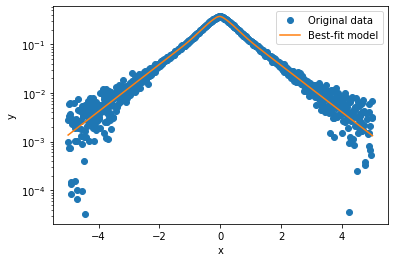

In [2]:
import matplotlib.pyplot as plt

# Define the model and fitter
model = H_plus_G()
fitter = LevMarLSQFitter()

import numpy as np

# Generate some synthetic data
np.random.seed(42)

# Generate x values
x_data = np.linspace(-5, 5, 1000)

# Generate y values using the H_plus_G model with some true parameter values
true_params = {
    'alpha': 1.1133, 
    'beta': -2.609e-4, 
    'delta': 0.1, 
    'mu': -1.931e-2, 
    'meanG': -3.531e-2, 
    'sigmaG': 0.4092, 
    'A0': 0.6174, 
    'A1': 0.3826
}
y_data = H_plus_G( **true_params)
y_vals = y_data(x_data)

# Add some Gaussian noise to the y values
noise = 0.003
y_vals += np.random.normal(0, noise, size=len(y_vals))


# Fit the model to the data
best_fit_model = fitter(model, x_data, y_vals)

# Generate y values for the best-fit model
best_fit_y = best_fit_model(x_data)

# Plot the original data and the best-fit model
plt.plot(x_data, y_vals, 'o', label='Original data')
plt.semilogy(x_data, best_fit_y, '-', label='Best-fit model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


### Print a comparison of the initial and optimized parameter values

In [9]:

print("Parameter".ljust(15) + "Initial Value".ljust(20) + "Optimized Value")
print("-"*50)
for name in model.param_names:
    initial_value = true_params[name]
    optimized_value = best_fit_model.parameters[model.param_names.index(name)]
    print(name.ljust(15) + f"{initial_value:.5f}".ljust(20) + f"{optimized_value:.5f}")


Parameter      Initial Value       Optimized Value
--------------------------------------------------
alpha          1.11330             1.11108
beta           -0.00026            0.00229
delta          0.10000             0.09404
mu             -0.01931            -0.02411
meanG          -0.03531            -0.02558
sigmaG         0.40920             0.41107
A0             0.61740             0.61912
A1             0.38260             0.37073
